# House Price Prediction 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("D:\PERSONAL DEV\CAREER\Data Analytics\Data Files\kc_house_data.csv")

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.shape

(21613, 21)

In [6]:
#checking null values 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#checking duplicated rows
df.duplicated().sum()

0

Let's explore the zipcode column , this is an integer data type but it would workout the best if we change it to categorical that is to object as its cardinality neither low nor high. 

In [8]:
df["zipcode"].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: int64

In [9]:
df["zipcode"].nunique()

70

In [10]:
df["zipcode"]=df["zipcode"].astype("object")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

Let us drop columns that we will not use for our model

In [12]:
df = df.drop(columns=["id","date","sqft_living15","sqft_lot15"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  object 
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
dtypes: float64(5), int64(11), object(1)
memory usage: 

In [14]:
df["bedrooms"].unique()


array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

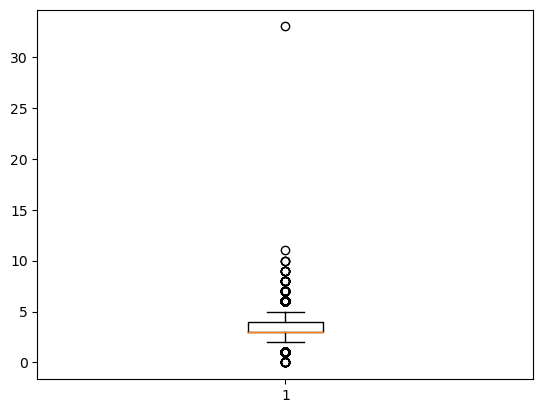

In [15]:
plt.boxplot(df["bedrooms"]);

We have an outlier a house with 33 bedrooms.It might have been entered incorrectly it was supposed to be a 3, we are going to drop the observation with 33 bedrooms.

In [16]:
df=df.drop(df[df["bedrooms"]==33].index)

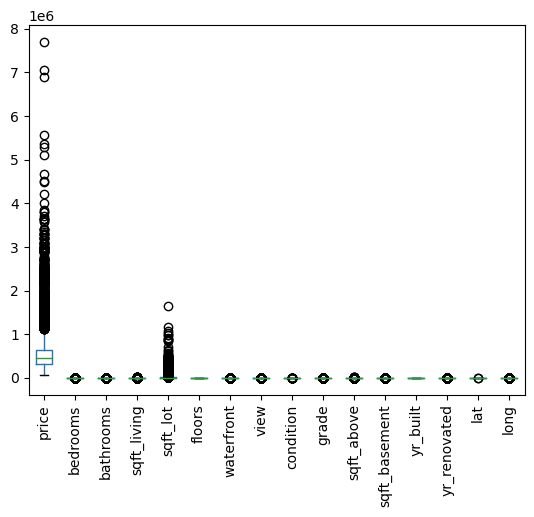

In [17]:
df.boxplot(grid=False)
plt.xticks(rotation=90);

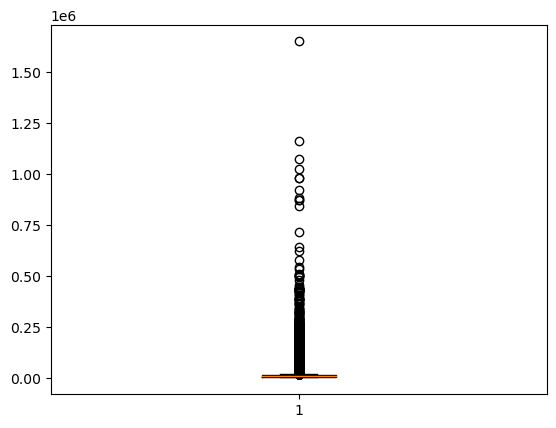

In [18]:
plt.boxplot(df["sqft_lot"]);

In [19]:
df["sqft_lot"].max()

1651359

Let us check for multicollinearity among our features, using a heatmap.

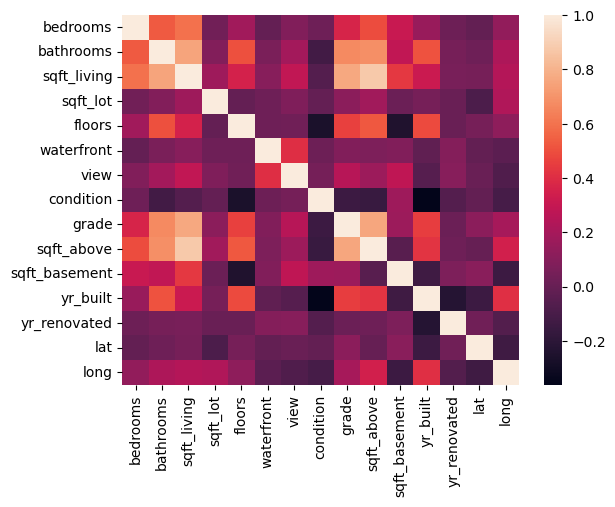

In [20]:
corr=df.drop(columns="price").corr()
sns.heatmap(corr);

Floors is highly correlated with most of the other comuns , so we drop it. 

In [21]:
df = df.drop(columns = "floors")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21612 non-null  float64
 1   bedrooms       21612 non-null  int64  
 2   bathrooms      21612 non-null  float64
 3   sqft_living    21612 non-null  int64  
 4   sqft_lot       21612 non-null  int64  
 5   waterfront     21612 non-null  int64  
 6   view           21612 non-null  int64  
 7   condition      21612 non-null  int64  
 8   grade          21612 non-null  int64  
 9   sqft_above     21612 non-null  int64  
 10  sqft_basement  21612 non-null  int64  
 11  yr_built       21612 non-null  int64  
 12  yr_renovated   21612 non-null  int64  
 13  zipcode        21612 non-null  object 
 14  lat            21612 non-null  float64
 15  long           21612 non-null  float64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.8+ MB


## Splitting data

In [23]:
target = "price"
X = df.drop(columns = target)
y = df[target]


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17289, 15)
(17289,)
(4323, 15)
(4323,)


## Linear Regression

In [25]:
model = make_pipeline(OneHotEncoder(),LinearRegression())

model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['zipcode'])),
                ('linearregression', LinearRegression())])

In [26]:
print("Training MAE:",mean_absolute_error(y_train, model.predict(X_train)))
print("r_2_score:",r2_score(y_train, model.predict(X_train)))

Training MAE: 95587.1765706477
r_2_score: 0.8047697293495251


In [27]:
print("Training MAE:",mean_absolute_error(y_test, model.predict(X_test)))
print("r_2_score:",r2_score(y_test, model.predict(X_test)))

Training MAE: 98802.4619408653
r_2_score: 0.8097490353339246


The mean absolute error increased showing overfitting but the r2 score is around the same range.
Let us show the 5 most influential coeffients for the model.




In [28]:
intercept = model.named_steps["linearregression"].intercept_
coefficients = model.named_steps["linearregression"].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:10])

coefficients len: 84
[-3.09009599e+04  1.73007110e+04 -3.06076446e+12  2.23923153e-01
  6.03968469e+05  5.22289450e+04  2.60178666e+04  5.81271451e+04
  3.06076446e+12  3.06076446e+12]


In [30]:
feature_names = model.named_steps["onehotencoder"].get_feature_names_out()
print("features len:", len(feature_names))
print(feature_names[:5]) 

features len: 84
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront']


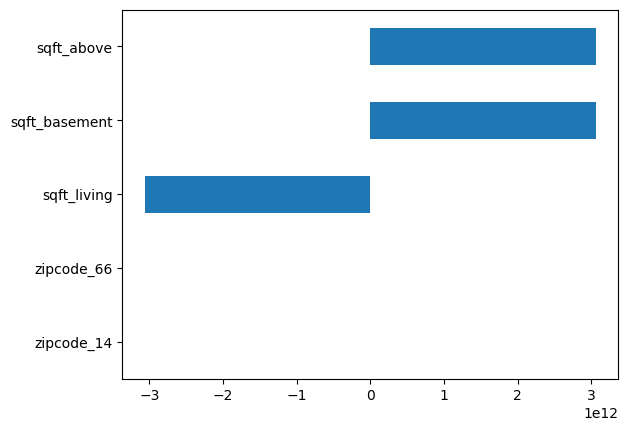

In [31]:
feat_imp = pd.Series(coefficients ,index = feature_names)
feat_imp.sort_values(key=abs).tail(5).plot(kind="barh");

### Ridge 

In [32]:
ridge_model = make_pipeline(OneHotEncoder(),Ridge())

ridge_model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['zipcode'])),
                ('ridge', Ridge())])

In [33]:
print("Training MAE:",mean_absolute_error(y_train, ridge_model.predict(X_train)))
print("r_2_score:",r2_score(y_train, ridge_model.predict(X_train)))

Training MAE: 95588.52197205297
r_2_score: 0.8047453179665301


In [34]:
print("Training MAE:",mean_absolute_error(y_test, ridge_model.predict(X_test)))
print("r_2_score:",r2_score(y_test, ridge_model.predict(X_test)))

Training MAE: 98842.63161294957
r_2_score: 0.809229517984535


There so no difference in terms of performance between the linear regression model and the ridge model. 